# 2 Uncertain climate dynamics

## 2.1 Simple approximation to climate dynamics

We use exponentially weighted average of each of response functions as coefficients $\{\theta_\ell\}_{\ell=1}^L$ in our computations. 
The discount rate $\delta=0.01$.

The histogram of those coefficients are represented below:

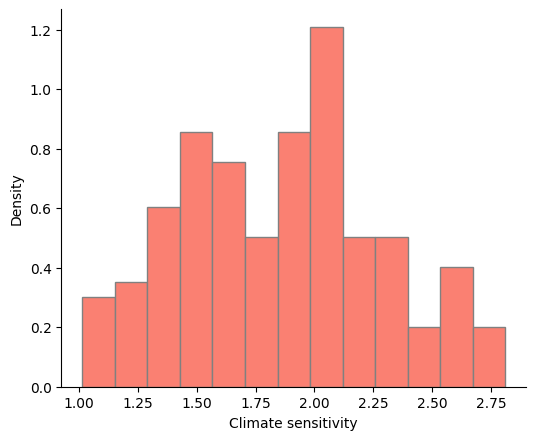

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['legend.frameon'] = False
# climate sensitivity histogram
θ_list = pd.read_csv('data/model144.csv', header=None).to_numpy()[:, 0]/1000. 
plt.figure(figsize=(6,5), dpi=100)
plt.hist(θ_list*1000, bins=13, density=True, color="salmon", ec="gray")
plt.xlabel("Climate sensitivity")
plt.ylabel("Density")
plt.show()

## 2.2 Stochastic climate pulses

To explore uncertainty, we introduce explicit stochasticity as a precursor to the study of uncertainty.  We capture this randomness in part by an exogenous forcing processes that evolves as:

$$
dZ_t = \mu_z(Z_t) dt + \sigma_z(Z_t) dW_t
$$

where
$\{ W_t : t \ge 0\}$  a multivariate standard Brownian motion.  We partition the vector Brownian motion into two subvectors as follows:

$$
dW_t = \begin{bmatrix} dW_t^y \cr dW_t^k \end{bmatrix}
$$

where the first component consists of the climate change shocks and the second component contains the technology shocks. 
Consider an emissions "pulse" of the form

$$
\left(\iota_y \cdot Z_t \right) {\mathcal E}_t  \left( \theta dt + \varsigma \cdot dW_t^y\right)
$$

where ${\mathcal E}_t$ is fossil fuel emissions and $\iota_y \cdot Z = \{ \iota_y \cdot Z_t : t\ge 0\}$ is a positive process which we normalize to have mean one.
The $\iota_y\cdot Z$-process captures "left out" components of the climate system’s reaction to an emission of ${\mathcal E}_t$ gigatons into the atmosphere while the $\varsigma \cdot dW$ process captures short time scale fluctuations.   
We will use a positive Feller square root process for the $\iota_y\cdot Z$ process in our analysis.




Within this framework, we impose the "Matthews' approximation" by making the consequence of the pulse permanent:

$$
 dY_t = \mu_y(Z_t, {\mathcal E}_t) dt + \sigma_y(Z_t, {\mathcal E}_t) dW_t^y
$$

where

$$
\begin{align*}
\mu_y(z, e) & =  e \left(\iota_y \cdot z \right) \theta   \cr
\sigma_y(z, e) & = e \left(\iota_y \cdot z \right) \varsigma'
\end{align*}
$$

Throughout, we will use uppercase letters to denote random vector or stochastic processes and lower case letters to denote possible realizations.
Armed with this "Matthews' approximation", we collapse the climate change uncertainty into the cross-model empirical distribution reported in the figure above. We will eventually introduce uncertainty about $\theta$.




> **Remark 1**
>
>For a more general starting point, let $Y_t$ be a vector used to represent temperature dynamics where the temperature
impact on damages is the first component of  $Y_t$.
This state vector evolves according to:
>$$
dY_t = \Lambda Y_t dt +   {\mathcal E}_t  \left(\iota_y \cdot Z_t \right)  \left(\Theta dt + \Sigma dW_t^y \right)
$$
>where $\Lambda$ is a square matrix and $\Theta$ is a column vector.
>Given an initial condition $Y_0$, the solution for $Y_t$ satisfies:
>$$
Y_t = \exp \left( t \Lambda \right) Y_0 + \int_0^t  \exp\left[ (t-u) \Lambda \right] \left(\iota_y \cdot Z_t \right) {\mathcal E}_t \left(\Theta dt + \Sigma dW_t^y \right)
$$
>
>Thus under this specification, the expected future response of $Y$  to a pulse at date zero is:
>$$
 \exp \left( u \Lambda \right) \Theta.
$$
>
> It is the first component of this function that determines the response dynamics.  This generalization allows for multiple exponentials to approximate the pulse responses.  Our introduction of a multiple exponential approximation adapts for example, \cite{Joosetal:2013} and \cite{Pierrehumbert:2014}.\footnote{See equation (5) of \cite{Joosetal:2013} and  equations (1)-(3) of \cite{Pierrehumbert:2014}.   \citeauthor{Pierrehumbert:2014} puts the change in radiative forcing equal to a constant times the logarithm of the ratio of atmospheric $CO_2$ at date $t$ to atmospheric $CO_2$ at baseline date zero. His  Figures 1 and 2 illustrate how an approximation of the Earth System dynamics by three exponentials plus a constant tracks a radiative forcing induced by a pulse into the atmosphere at a baseline date from the atmosphere works quite well with half lives of approximately six, sixty five, and four hundred and fifty years.}
>
>As an example, we capture the initial rise in the emission responses by the following two-dimensional specification
>$$
\begin{align*}
dY_t^1& =  Y_t^2 dt \cr
dY_t^2 & = - \lambda Y_t^2 dt + \lambda  \theta {\mathcal E}_t dt
\end{align*}
$$
>
>which implies the response to a pulse is:
>$$
\theta \left[ 1 - \exp( - \lambda t) \right] {\mathcal E}_0
$$
> A high value of $\lambda$ implies more rapid convergence to the limiting response $\theta  {\mathcal E}_0$.  This  approximation is intended as a simple representation of the dynamics where the second state variable can be thought of as an exponentially weighted average of current and past emissions.\footnote{In independent work, \cite{DietzVenmans:2019} and \cite{BarnettBrockHansen:2020} have used such simplified approximations within an explicit economic optimization framework.  The former contribution includes the initial rapid upswing in the impulse response functions.  The latter contribution  abstracts from this.   \citeauthor{BarnettBrockHansen:2020} instead explore ways to confront uncertainty, broadly-conceived, while using the Matthews approximation.}


> **Remark 2**
>
> The  approximation in \cite{Geoffroy:2013} includes the logarithm of carbon in the atmosphere as argued for by \cite{Arrhenius:1896} which is not directly reflected in the linear approximation to the temperature dynamics that we use.  The pulse experiments from \cite{Joosetal:2013} show a more than proportional change in atmospheric carbon when the pulse size is changed.  It turns out that this is enough to approximately offset the logarithmic \citeauthor{Arrhenius:1896} adjustment so that the long-term temperature response remains approximately proportional for small pulse sizes.  See also \cite{Pierrehumbert:2014} who discusses the approximate offsetting impacts of nonlinearity in temperature and climate dynamics.

Next section:

[Section 3: Stochastic damage](sec3_StochasticDamage.ipynb)